## lab program 1: Image Convolution And Edge Detection Using Sebol Operation

<h3>Background:</h3>
<h5>Convolution is a fundamental operation in image processing used to apply filters to images. The Sobel operator is used to detect edges by highlighting regions with a high rate of intensity change </h5>
<h3>Skill/Prerequisites:</h3>
<h5>Basic python,familarity with image procesing libraries (OpenCV),and understanding of convolution.</h5>
<H3>Aim and Objective</H3>
<ul><li>Understanding the work of fliters
<li>Filters and textures</ul>


# Install Opencv

In [11]:
!pip install opencv-python

# import the libraries

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load the image

In [19]:
# load this image
image = cv2.imread('C:/Users/abdul/Desktop/one.png',cv2.IMREAD_GRAYSCALE)

In [23]:
# display the image pixels
image

array([[177, 171, 162, ...,  78,  78,  78],
       [170, 167, 160, ...,  78,  78,  78],
       [167, 163, 160, ...,  78,  78,  78],
       ...,
       [  0,   0,   0, ...,  34,  34,  34],
       [  0,   0,   0, ...,  28,  28,  28],
       [  0,   0,   0, ...,  21,  21,  21]], dtype=uint8)

### Apply sobel operator for edge detection

In [29]:
# apply sobel operator for edge detection 
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

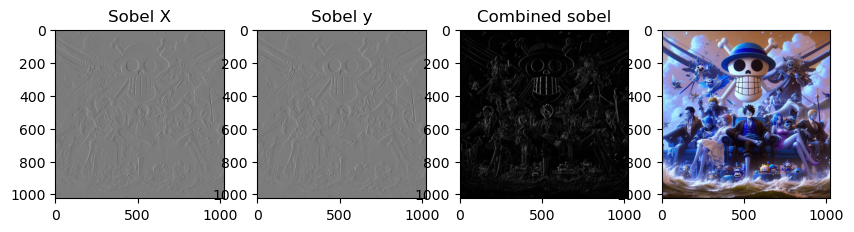

In [40]:
# display the results
plt.figure(figsize=(10,5))
plt.subplot(1,4,1), plt.imshow(sobel_x, cmap='gray'),plt.title('Sobel X')
plt.subplot(1,4,2), plt.imshow(sobel_y, cmap='gray'),plt.title('Sobel y')
plt.subplot(1,4,3), plt.imshow(sobel_combined, cmap='gray'),plt.title('Combined sobel')
plt.subplot(1,4,4), plt.imshow(image,cmap='grey')
plt.show()

### Guassian Blur filter

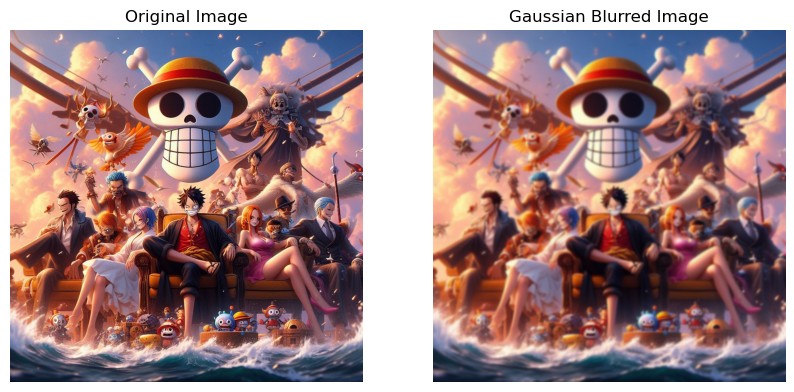

In [50]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('C:/Users/abdul/Desktop/one.png')

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Convert BGR to RGB for displaying with matplotlib
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Display the original and blurred images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.show()

### Gabor filter

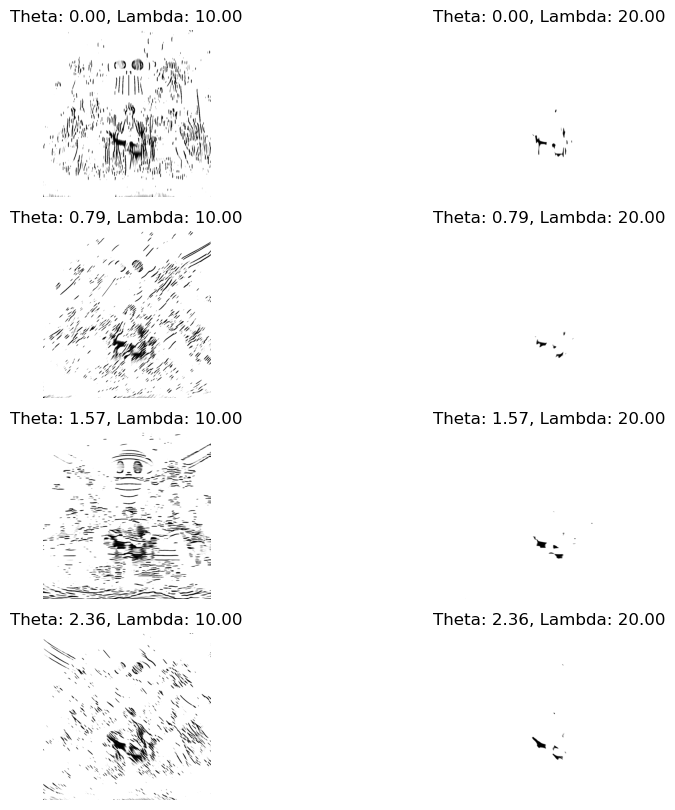

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gabor_filters(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Define Gabor filter parameters
    ksize = 31  # Size of the filter
    sigma = 4.0  # Standard deviation of the Gaussian function
    lambdas = [10.0, 20.0]  # Wavelengths of the sinusoidal factor
    thetas = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Different orientations
    gamma = 0.5  # Spatial aspect ratio
    phi = 0  # Phase offset
    
    plt.figure(figsize=(10, 10))
    num = 1
    
    for theta in thetas:
        for lamda in lambdas:
            # Create Gabor kernel
            kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
            
            # Apply the Gabor filter to the image
            filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)
            
            # Plot results
            plt.subplot(len(thetas), len(lambdas), num)
            plt.imshow(filtered_image, cmap='gray')
            plt.title(f'Theta: {theta:.2f}, Lambda: {lamda:.2f}')
            plt.axis('off')
            num += 1
    
    plt.show()

# Test with an example image
image_path = '/Users/abdul/Desktop/one.png'
apply_gabor_filters(image_path)


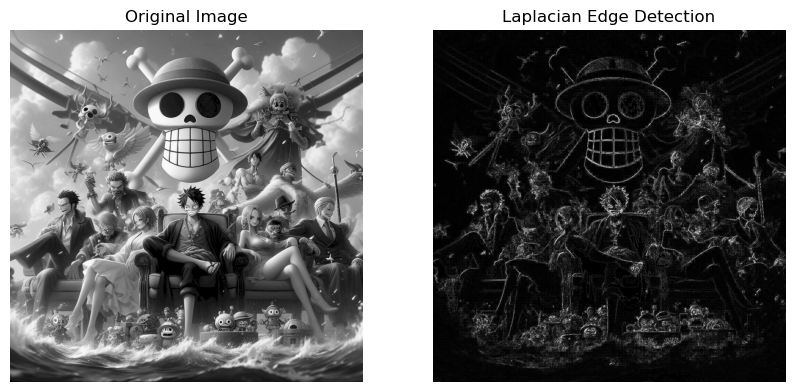

In [68]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/Users/abdul/Desktop/one.png', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert back to uint8
laplacian = cv2.convertScaleAbs(laplacian)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()


In [ ]:
### Magnitude s

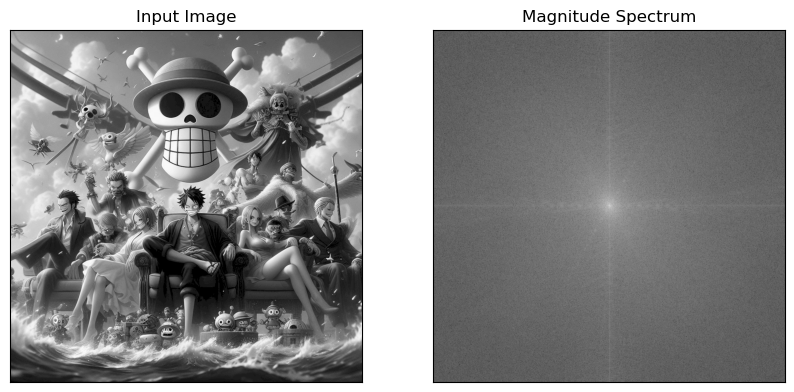

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_fourier_transform(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Perform the 2D Fourier Transform
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # Compute the magnitude spectrum
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

# Test with an example image
image_path = '/Users/abdul/Desktop/one.png'
apply_fourier_transform(image_path)


### Non-maximum suppression

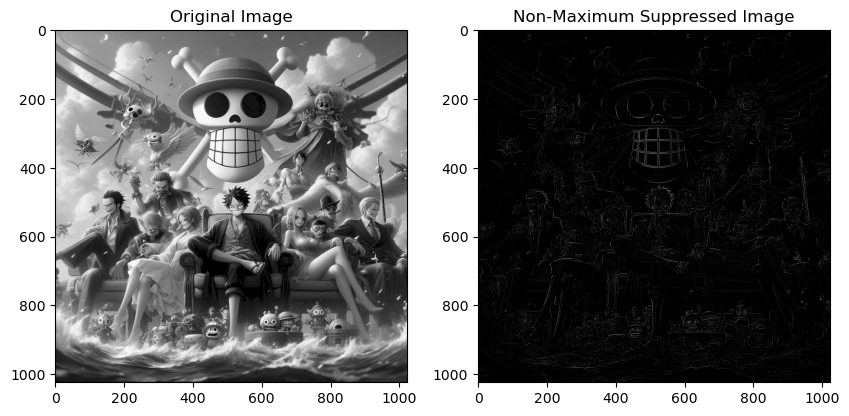

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_max_suppression(edges, D):
    M, N = edges.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

                # angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = edges[i, j + 1]
                    r = edges[i, j - 1]
                # angle 45
                elif (22.5 <= angle[i, j] < 67.5):
                    q = edges[i + 1, j - 1]
                    r = edges[i - 1, j + 1]
                # angle 90
                elif (67.5 <= angle[i, j] < 112.5):
                    q = edges[i + 1, j]
                    r = edges[i - 1, j]
                # angle 135
                elif (112.5 <= angle[i, j] < 157.5):
                    q = edges[i - 1, j - 1]
                    r = edges[i + 1, j + 1]

                if (edges[i, j] >= q) and (edges[i, j] >= r):
                    Z[i, j] = edges[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z

# Load image, convert to grayscale
image_path = '/Users/abdul/Desktop/one.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Detect edges using Sobel operator
Ix = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
G = np.hypot(Ix, Iy)
G = G / G.max() * 255
theta = np.arctan2(Iy, Ix)

# Apply Non-Maximum Suppression
nms = non_max_suppression(G, theta)

# Display results using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(nms, cmap='gray'), plt.title('Non-Maximum Suppressed Image')
plt.show()
